This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_images[2000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  94, 163,
         99, 228, 255, 202,  49,  58,  47,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 171, 245, 253,
        253, 253, 254, 221, 236, 174, 173,  72, 136,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 253, 253,
        253, 253, 208, 128, 197, 250, 243, 142, 123,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 241, 253, 253,
        199,  80,  35,  23,  47,  87,  87,  97, 110,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 137, 253, 253,
         54,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  92, 255, 254, 254,
        119,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4, 158, 254, 253, 199,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  77, 253, 254, 180,  31,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3, 203, 253, 254, 108,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 253, 253, 254,  43,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 219, 254, 255,  18,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 199, 253, 228,  62,  55,
         55,  55,  88,  35,  55,  12,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 109, 253, 254, 253, 253,
        253, 253, 254, 240, 253, 186,  95,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11, 215, 254, 253, 253,
        253, 253, 254, 253, 253, 253, 253,  84,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 189, 253, 253,
        253, 253, 228, 162, 207, 253, 253, 254,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,
         85,   0,   0,   0,   0,  40, 207, 255, 109,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  89, 248, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  21, 159, 245, 253, 165,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  79, 200, 230, 253, 245, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_labels[2000]

5

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#import tensorflow as tf
#from functools import partial
#activation=partial(tf.nn.leaky_relu, alpha=0.01)

# 2 warstwy, 512 i 10 neuronów, activation - to funkcje aktywacji
#softmax - używa się gdy jest klasyfikacja jeden z wielu

#ZADANIE DOM - zmniejszyć sieć neuronową jak najmocniej i żeby były jak najlepsze wyniki
#przy dużej ilości epok typu 30 albo 100
#np. 32

model = keras.Sequential([

    layers.Dense(12, activation="elu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
#optymalizator - lepsza wersja spadku gradientu, bedzie później na wykładzie
#funkcja straty
#metryka wypisywana na wyjście
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
#najpierw spłaszczenie danych, potem dzielenie powinno byc 256 a nie 255 bo tyle odcieni

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 256
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 256

**"Fitting" the model**

In [ ]:
#batch size - liczba przykładów, do wsady/grupy, aż przerobimy wszystkie dla danego zbioru
#jak wsyzstkie się wytrenuje to będzie jedna epoka
model.fit(train_images, train_labels, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 4s 7ms/step - loss: 1.4211 - accuracy: 0.6615
Epoch 2/30
469/469 [==============================] - 3s 5ms/step - loss: 0.7143 - accuracy: 0.8614
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.4835 - accuracy: 0.8868
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3896 - accuracy: 0.8994
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 0.3428 - accuracy: 0.9074
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.3146 - accuracy: 0.9126
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2955 - accuracy: 0.9165
Epoch 8/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2817 - accuracy: 0.9197
Epoch 9/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2704 - accuracy: 0.9228
Epoch 10/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2613 - accuracy: 0.924

**Using the model to make predictions**

In [ ]:
#predykcja - wektor z informacjami, wyniki pradopodobieństwa dla danego obrazka

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 65ms/step


array([1.0270132e-05, 3.0249180e-06, 3.9145893e-05, 7.4397511e-04,
       7.4521881e-06, 2.1740678e-04, 1.5522097e-07, 9.9790239e-01,
       1.0164625e-05, 1.0660286e-03], dtype=float32)

# Shades of grey from 256 to 16

In [121]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [122]:
grey_train_images = (train_images / 255 * 15).astype('uint8') # Przejscie na 16 poziomów szarosci
grey_test_images = (test_images / 255 * 15).astype('uint8') # Przejscie na 16 poziomów szarosci

In [123]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from functools import partial

model = keras.Sequential([
    # layers.Dropout(rate=0.3),
    layers.Reshape((784,), input_shape=(28, 28)),  # Przekształcenie obrazów do jednowymiarowej tablicy
    layers.Dense(8, activation=partial(tf.nn.leaky_relu, alpha=0.01)),  # Pierwsza warstwa ukryta
    layers.Dense(10, activation="softmax")  # Warstwa wyjściowa
])

In [124]:
from keras.optimizers import SGD

#optymalizator - lepsza wersja spadku gradientu, bedzie później na wykładzie
#rmsprop, adam, sgd, adagrad, sgd moment
#funkcja straty
#metryka wypisywana na wyjście
opti = SGD(momentum = 0.9)
#opti = "rsmprop"
#opti = "adam"
#opti = "sgd"
#opti = "adagrad"
model.compile(optimizer=opti,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [125]:
# Przygotowanie danych wejściowych
grey_train_images = grey_train_images.astype("float32") / 15.0
grey_test_images = grey_test_images.astype("float32") / 15.0


In [126]:
model.fit(grey_train_images, train_labels, epochs=30, batch_size=128)

Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6833 - accuracy: 0.8017
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8997
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.9080
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.3121 - accuracy: 0.9118
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.3027 - accuracy: 0.9143
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2953 - accuracy: 0.9165
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2905 - accuracy: 0.9181
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.9180
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2824 - accuracy: 0.9207
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.9219

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9979024

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2167 - accuracy: 0.9368
test_acc: 0.9368000030517578


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

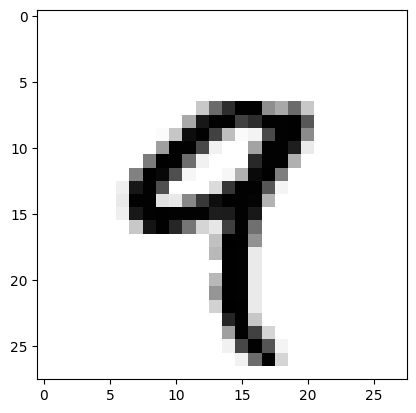

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.17 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2688 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1065 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0708 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0509 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0378 - accuracy: 0.9887


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.99
loss at batch 100: 2.23
loss at batch 200: 2.18
loss at batch 300: 2.05
loss at batch 400: 2.21
Epoch 1
loss at batch 0: 1.88
loss at batch 100: 1.87
loss at batch 200: 1.80
loss at batch 300: 1.68
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.56
loss at batch 100: 1.57
loss at batch 200: 1.47
loss at batch 300: 1.40
loss at batch 400: 1.49
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.33
loss at batch 200: 1.21
loss at batch 300: 1.19
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.16
loss at batch 200: 1.02
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.79


### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary